In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
import pandas as pd

# Load Data
df = pd.read_csv("Download Data - STOCK_US_XNAS_NFLX.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)
df['Volume'] = df['Volume'].str.replace(',', '').astype(float)
df = df.astype({'Open': float, 'High': float, 'Low': float, 'Close': float})
print(df)


              Open    High     Low   Close     Volume
Date                                                 
2025-03-03  983.00  994.93  964.81  973.70  3907447.0
2025-03-04  971.61  986.31  948.21  972.58  4392814.0
2025-03-05  973.62  995.60  969.48  990.92  3807935.0
2025-03-06  972.99  973.69  899.00  906.36  7852559.0
2025-03-07  897.64  904.89  858.07  891.11  7737488.0
2025-03-10  875.07  881.27  854.50  866.68  6995309.0
2025-03-11  867.41  910.68  866.00  895.10  7398934.0
2025-03-12  914.60  927.18  901.00  919.68  6865837.0
2025-03-13  913.00  921.89  887.51  890.17  5001698.0
2025-03-14  901.46  919.63  901.00  918.00  5200684.0
2025-03-17  939.95  967.63  934.42  950.02  7543146.0
2025-03-18  940.00  948.25  916.30  929.98  6009400.0
2025-03-19  935.77  968.00  924.00  959.49  6662361.0
2025-03-20  950.01  967.00  945.50  950.84  4466305.0
2025-03-21  941.64  963.65  940.95  960.29  5905429.0
2025-03-24  969.67  977.00  951.55  971.99  4677871.0
2025-03-25  978.18  998.70  

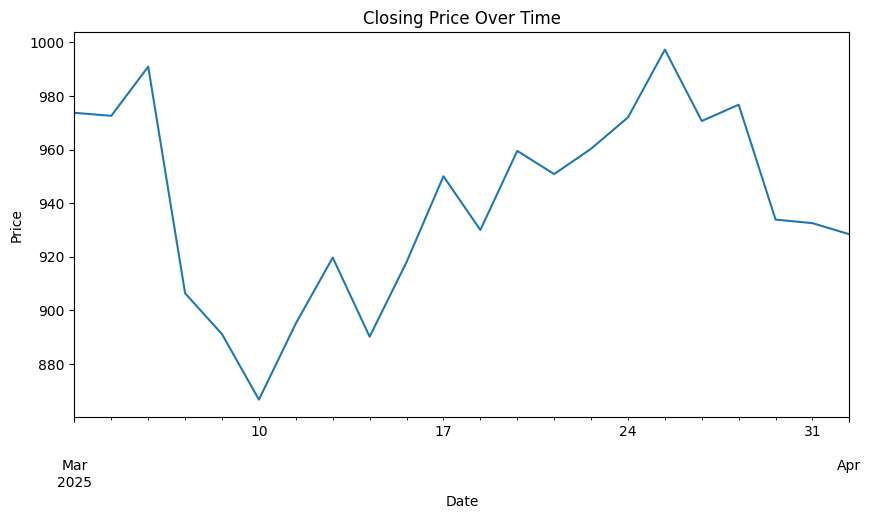

             Open        High         Low       Close        Volume
count   22.000000   22.000000   22.000000   22.000000  2.200000e+01
mean   941.530909  956.083636  923.337273  940.287273  5.334825e+06
std     36.015216   34.367913   36.956092   35.865131  1.557853e+06
min    867.410000  881.270000  854.500000  866.680000  3.047237e+06
25%    916.082500  928.457500  900.692500  918.420000  4.028789e+06
50%    940.820000  967.315000  926.615000  941.935000  4.839784e+06
75%    972.742500  983.982500  950.715000  971.655000  6.814968e+06
max    993.810000  998.700000  977.110000  997.280000  7.852559e+06


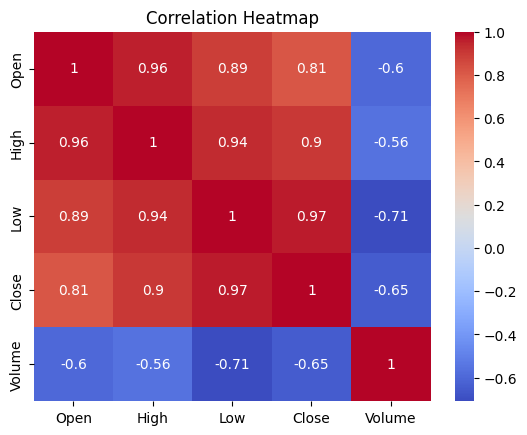

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot
df['Close'].plot(title='Closing Price Over Time', figsize=(10, 5))
plt.ylabel("Price")
plt.show()

# Summary stats
print(df.describe())

# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


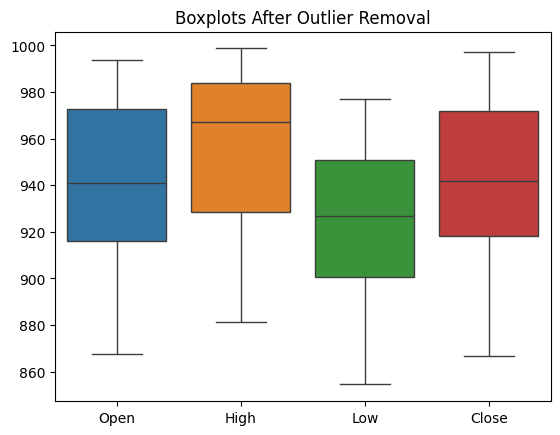

In [ ]:
from scipy.stats import zscore

# Z-score method
z_scores = df[['Open', 'High', 'Low', 'Close']].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)
df_cleaned = df[~outliers]  # remove outliers

# Boxplot visualization
sns.boxplot(data=df_cleaned[['Open', 'High', 'Low', 'Close']])
plt.title("Boxplots After Outlier Removal")
plt.show()

df_cleaned = df[~outliers]  # Only if you applied outlier detection earlier


In [ ]:
from statsmodels.tsa.stattools import adfuller

# ADF Test
result = adfuller(df_cleaned['Close'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# Differencing if not stationary
df_diff = df_cleaned['Close'].diff().dropna()

# ADF after differencing
adf_diff = adfuller(df_diff)
print("ADF after differencing:", adf_diff[0], "| p-value:", adf_diff[1])


ADF Statistic: -2.2010492353695437
p-value: 0.20586486536335363
ADF after differencing: -5.0183209658930075 | p-value: 2.0412967923328246e-05


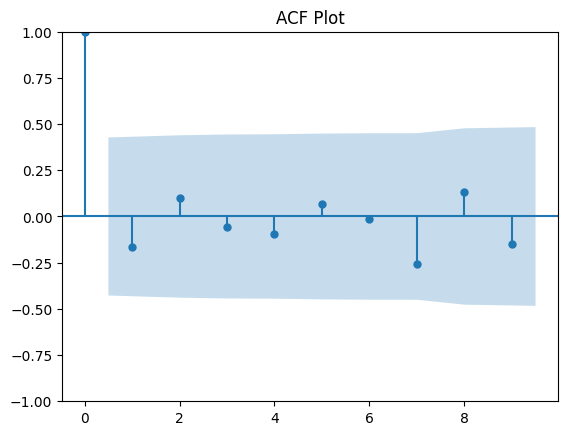

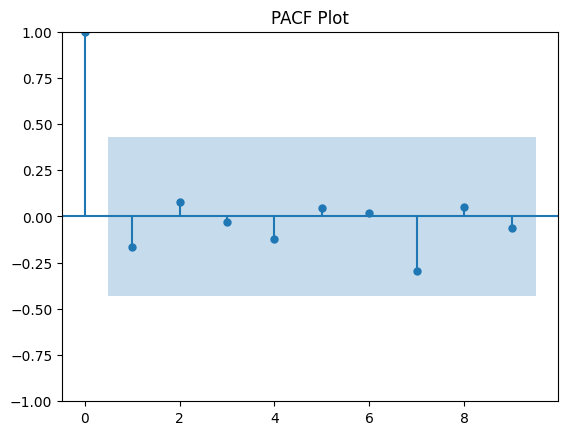

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Dynamically adjust lag based on sample size
max_lag = len(df_diff) // 2 - 1  # Make sure it's under 50%

plot_acf(df_diff, lags=max_lag)
plt.title("ACF Plot")
plt.show()

plot_pacf(df_diff, lags=max_lag)
plt.title("PACF Plot")
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Train-test split
train = df_cleaned['Close'][:-5]
test = df_cleaned['Close'][-5:]

# Fit ARIMA (adjust order based on ACF/PACF)
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

# Forecast
forecast = model_fit.forecast(steps=5)
print("Forecast:", forecast)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   17
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -77.124
Date:                Sat, 12 Apr 2025   AIC                            160.247
Time:                        03:02:14   BIC                            162.565
Sample:                    03-03-2025   HQIC                           160.366
                         - 03-25-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2743      2.614     -0.105      0.916      -5.398       4.849
ma.L1          0.1597      2.705      0.059      0.953      -5.143       5.462
sigma2       899.3746    285.954      3.145      0.0

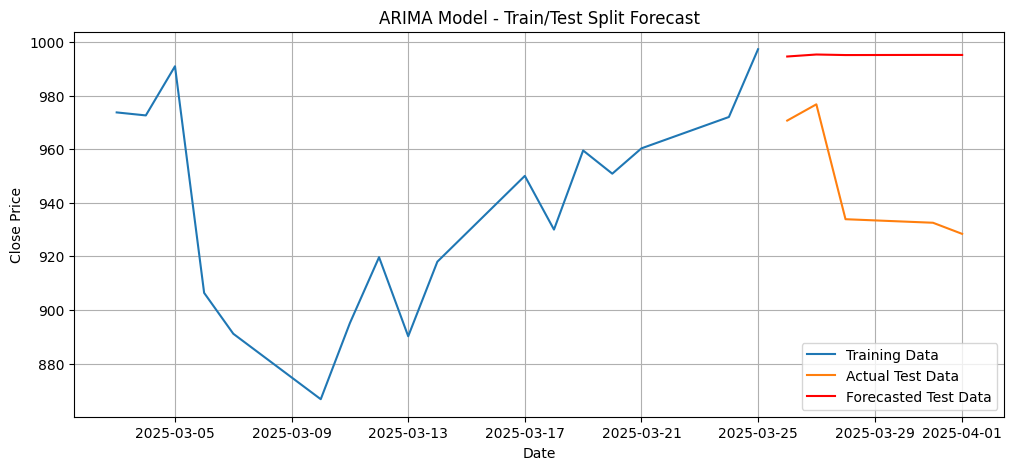

In [ ]:
import matplotlib.pyplot as plt

# Step 4: Plot the forecast vs actual test data
plt.figure(figsize=(12,5))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(forecast, label='Forecasted Test Data', color='red')
plt.title('ARIMA Model - Train/Test Split Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
train = df_cleaned['Close'][:-5]
test = df_cleaned['Close'][-5:]


In [ ]:
# Fit ARIMA (adjust order based on ACF/PACF)
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

# Forecast
forecast = model_fit.forecast(steps=5)
print("Forecast:", forecast)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   17
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -77.124
Date:                Sat, 12 Apr 2025   AIC                            160.247
Time:                        05:11:29   BIC                            162.565
Sample:                    03-03-2025   HQIC                           160.366
                         - 03-25-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2743      2.614     -0.105      0.916      -5.398       4.849
ma.L1          0.1597      2.705      0.059      0.953      -5.143       5.462
sigma2       899.3746    285.954      3.145      0.0

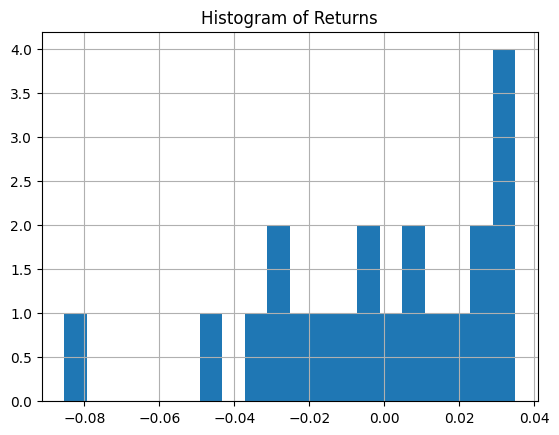

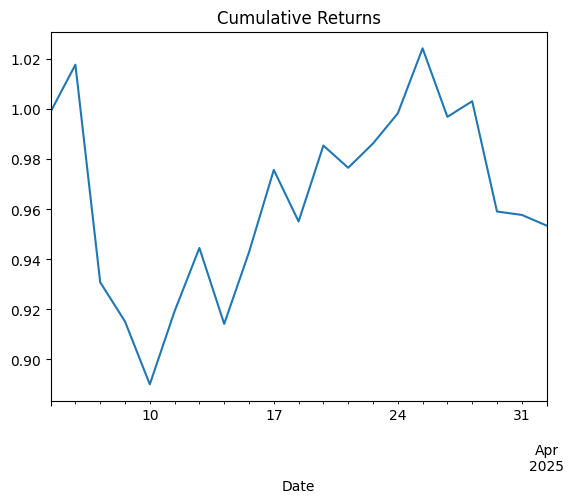

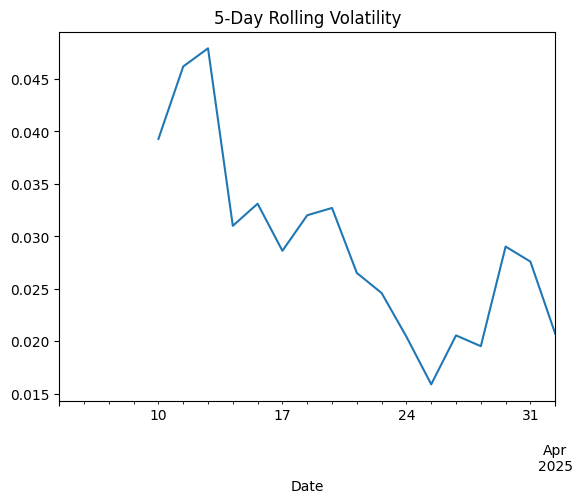

Max Drawdown: -12.54%


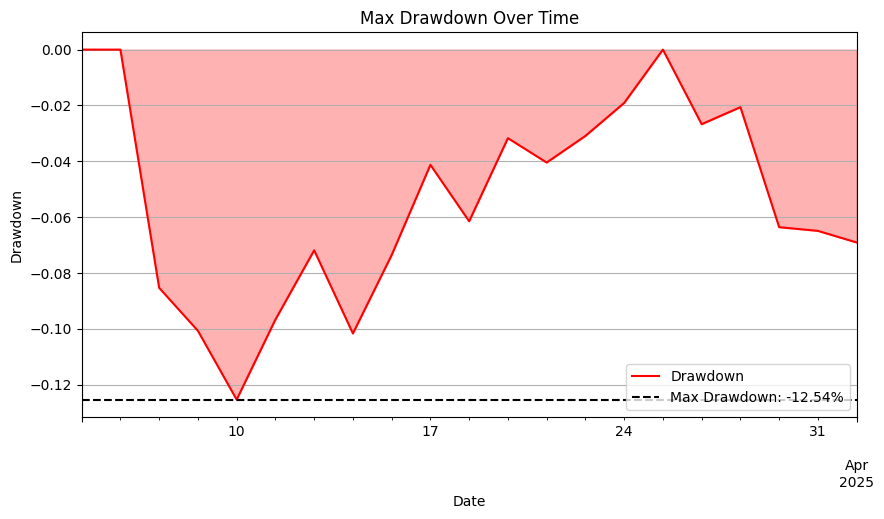

In [ ]:
import numpy as np

# Calculate returns
returns = df_cleaned['Close'].pct_change().dropna()

# Cumulative returns
cumulative_returns = (1 + returns).cumprod()

# Rolling volatility
rolling_vol = returns.rolling(window=5).std()

# Histogram of returns
returns.hist(bins=20)
plt.title("Histogram of Returns")
plt.show()

# Cumulative returns plot
cumulative_returns.plot(title="Cumulative Returns")
plt.show()

# Rolling volatility plot
rolling_vol.plot(title="5-Day Rolling Volatility")
plt.show()

# Max Drawdown
cum_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - cum_max) / cum_max
max_drawdown = drawdown.min()
print(f"Max Drawdown: {max_drawdown:.2%}")

# Plot drawdown
plt.figure(figsize=(10, 5))
drawdown.plot(color='red', label='Drawdown')
plt.axhline(y=max_drawdown, color='black', linestyle='--', label=f'Max Drawdown: {max_drawdown:.2%}')
plt.fill_between(drawdown.index, drawdown, 0, color='red', alpha=0.3)
plt.title("Max Drawdown Over Time")
plt.ylabel("Drawdown")
plt.legend()
plt.grid(True)
plt.show()